In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import sklearn.model_selection as model_selection
from sklearn import metrics
from sklearn.utils import resample
from sklearn import tree
import graphviz
import os
import pydotplus as py
from xgboost import plot_importance
from IPython.display import Image
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

           ...           RelationshipSatisfaction StandardHours  \
0          ...                                  1            80   
1          ...                                  4            80   
2          ...                                  2            80   
3          ...                                  3            80   
4          ...                                  4            80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
0                 0                  8                      0               1   
1                 1                 10                      3               3   
2                 0                  7                      3               3   
3                 0                  8                      3               3   
4                 1                  6                      3               3   

   YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0               6                  4                        0   
1              10                  7                        1   
2               0                  0                        0   
3               8                  7                        3   
4               2                  2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 35 columns]

In [4]:
data.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel          ...           RelationshipSatisfaction  \
count  1470.000000          ...                        1470.000000   
mean      2.063946          ...                           2.712245   
std       1.106940          ...                           1.081209   
min       1.000000          ...                           1.000000   
25%       1.000000          ...                           2.000000   
50%       2.000000          ...                           3.000000   
75%       3.000000          ...                           4.000000   
max       5.000000          ...                           4.000000   

       StandardHours  StockOptionLevel  TotalWorkingYears  \
count         1470.0       1470.000000        1470.000000   
mean            80.0          0.793878          11.279592   
std              0.0          0.852077           7.780782   
min             80.0          0.000000           0.000000   
25%             80.0          0.000000           6.000000   
50%             80.0          1.000000          10.000000   
75%             80.0          1.000000          15.000000   
max             80.0          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1470.000000      1470.000000     1470.000000   
mean                2.799320         2.761224        7.008163   
std                 1.289271         0.706476        6.126525   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1470.000000              1470.000000           1470.000000  
mean             4.229252                 2.187755              4.123129  
std              3.623137                 3.222430              3.568136  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000  

[8 rows x 26 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [6]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Coreleation between data

In [8]:
corr = data.corr()

In [9]:
corr

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EmployeeCount                  NaN        NaN               NaN        NaN   
EmployeeNumber           -0.010145  -0.050990          0.032916   0.042070   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StandardHours                  NaN        NaN               NaN        NaN   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EmployeeCount  EmployeeNumber  \
Age                                 NaN       -0.010145   
DailyRate                           NaN       -0.050990   
DistanceFromHome                    NaN        0.032916   
Education                           NaN        0.042070   
EmployeeCount                       NaN             NaN   
EmployeeNumber                      NaN        1.000000   
EnvironmentSatisfaction             NaN        0.017621   
HourlyRate                          NaN        0.035179   
JobInvolvement                      NaN       -0.006888   
JobLevel                            NaN       -0.018519   
JobSatisfaction                     NaN       -0.046247   
MonthlyIncome                       NaN       -0.014829   
MonthlyRate                         NaN        0.012648   
NumCompaniesWorked                  NaN       -0.001251   
PercentSalaryHike                   NaN       -0.012944   
PerformanceRating                   NaN       -0.020359   
RelationshipSatisfaction            NaN       -0.069861   
StandardHours                       NaN             NaN   
StockOptionLevel                    NaN        0.062227   
TotalWorkingYears                   NaN       -0.014365   
TrainingTimesLastYear               NaN        0.023603   
WorkLifeBalance                     NaN        0.010309   
YearsAtCompany                      NaN       -0.011240   
YearsInCurrentRole                  NaN       -0.008416   
YearsSinceLastPromotion             NaN       -0.009019   
YearsWithCurrManager                NaN       -0.009197   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Educat

In [10]:
data['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [11]:
data['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [12]:
data['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [13]:
data.shape

(1470, 35)

In [14]:
data = data.drop(['EmployeeCount','StandardHours','Over18'],axis=1)

In [15]:
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               4   
3                 3          4  Life Sciences               5   
4                 2          1        Medical               7   

   EnvironmentSatisfaction          ...          PerformanceRating  \
0                        2          ...                          3   
1                        3          ...                          4   
2                        4          ...                          3   
3                        4          ...                          3   
4                        1          ...                          3   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   
2                         2                 0                  7   
3                         3                 0                  8   
4                         4                 1                  6   

  TrainingTimesLastYear  WorkLifeBalance YearsAtCompany  YearsInCurrentRole  \
0                     0                1              6                   4   
1                     3                3             10                   7   
2                     3                3              0                   0   
3                     3                3              8                   7   
4                     3                3              2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2  

[5 rows x 32 columns]

In [ ]:
# data Vi

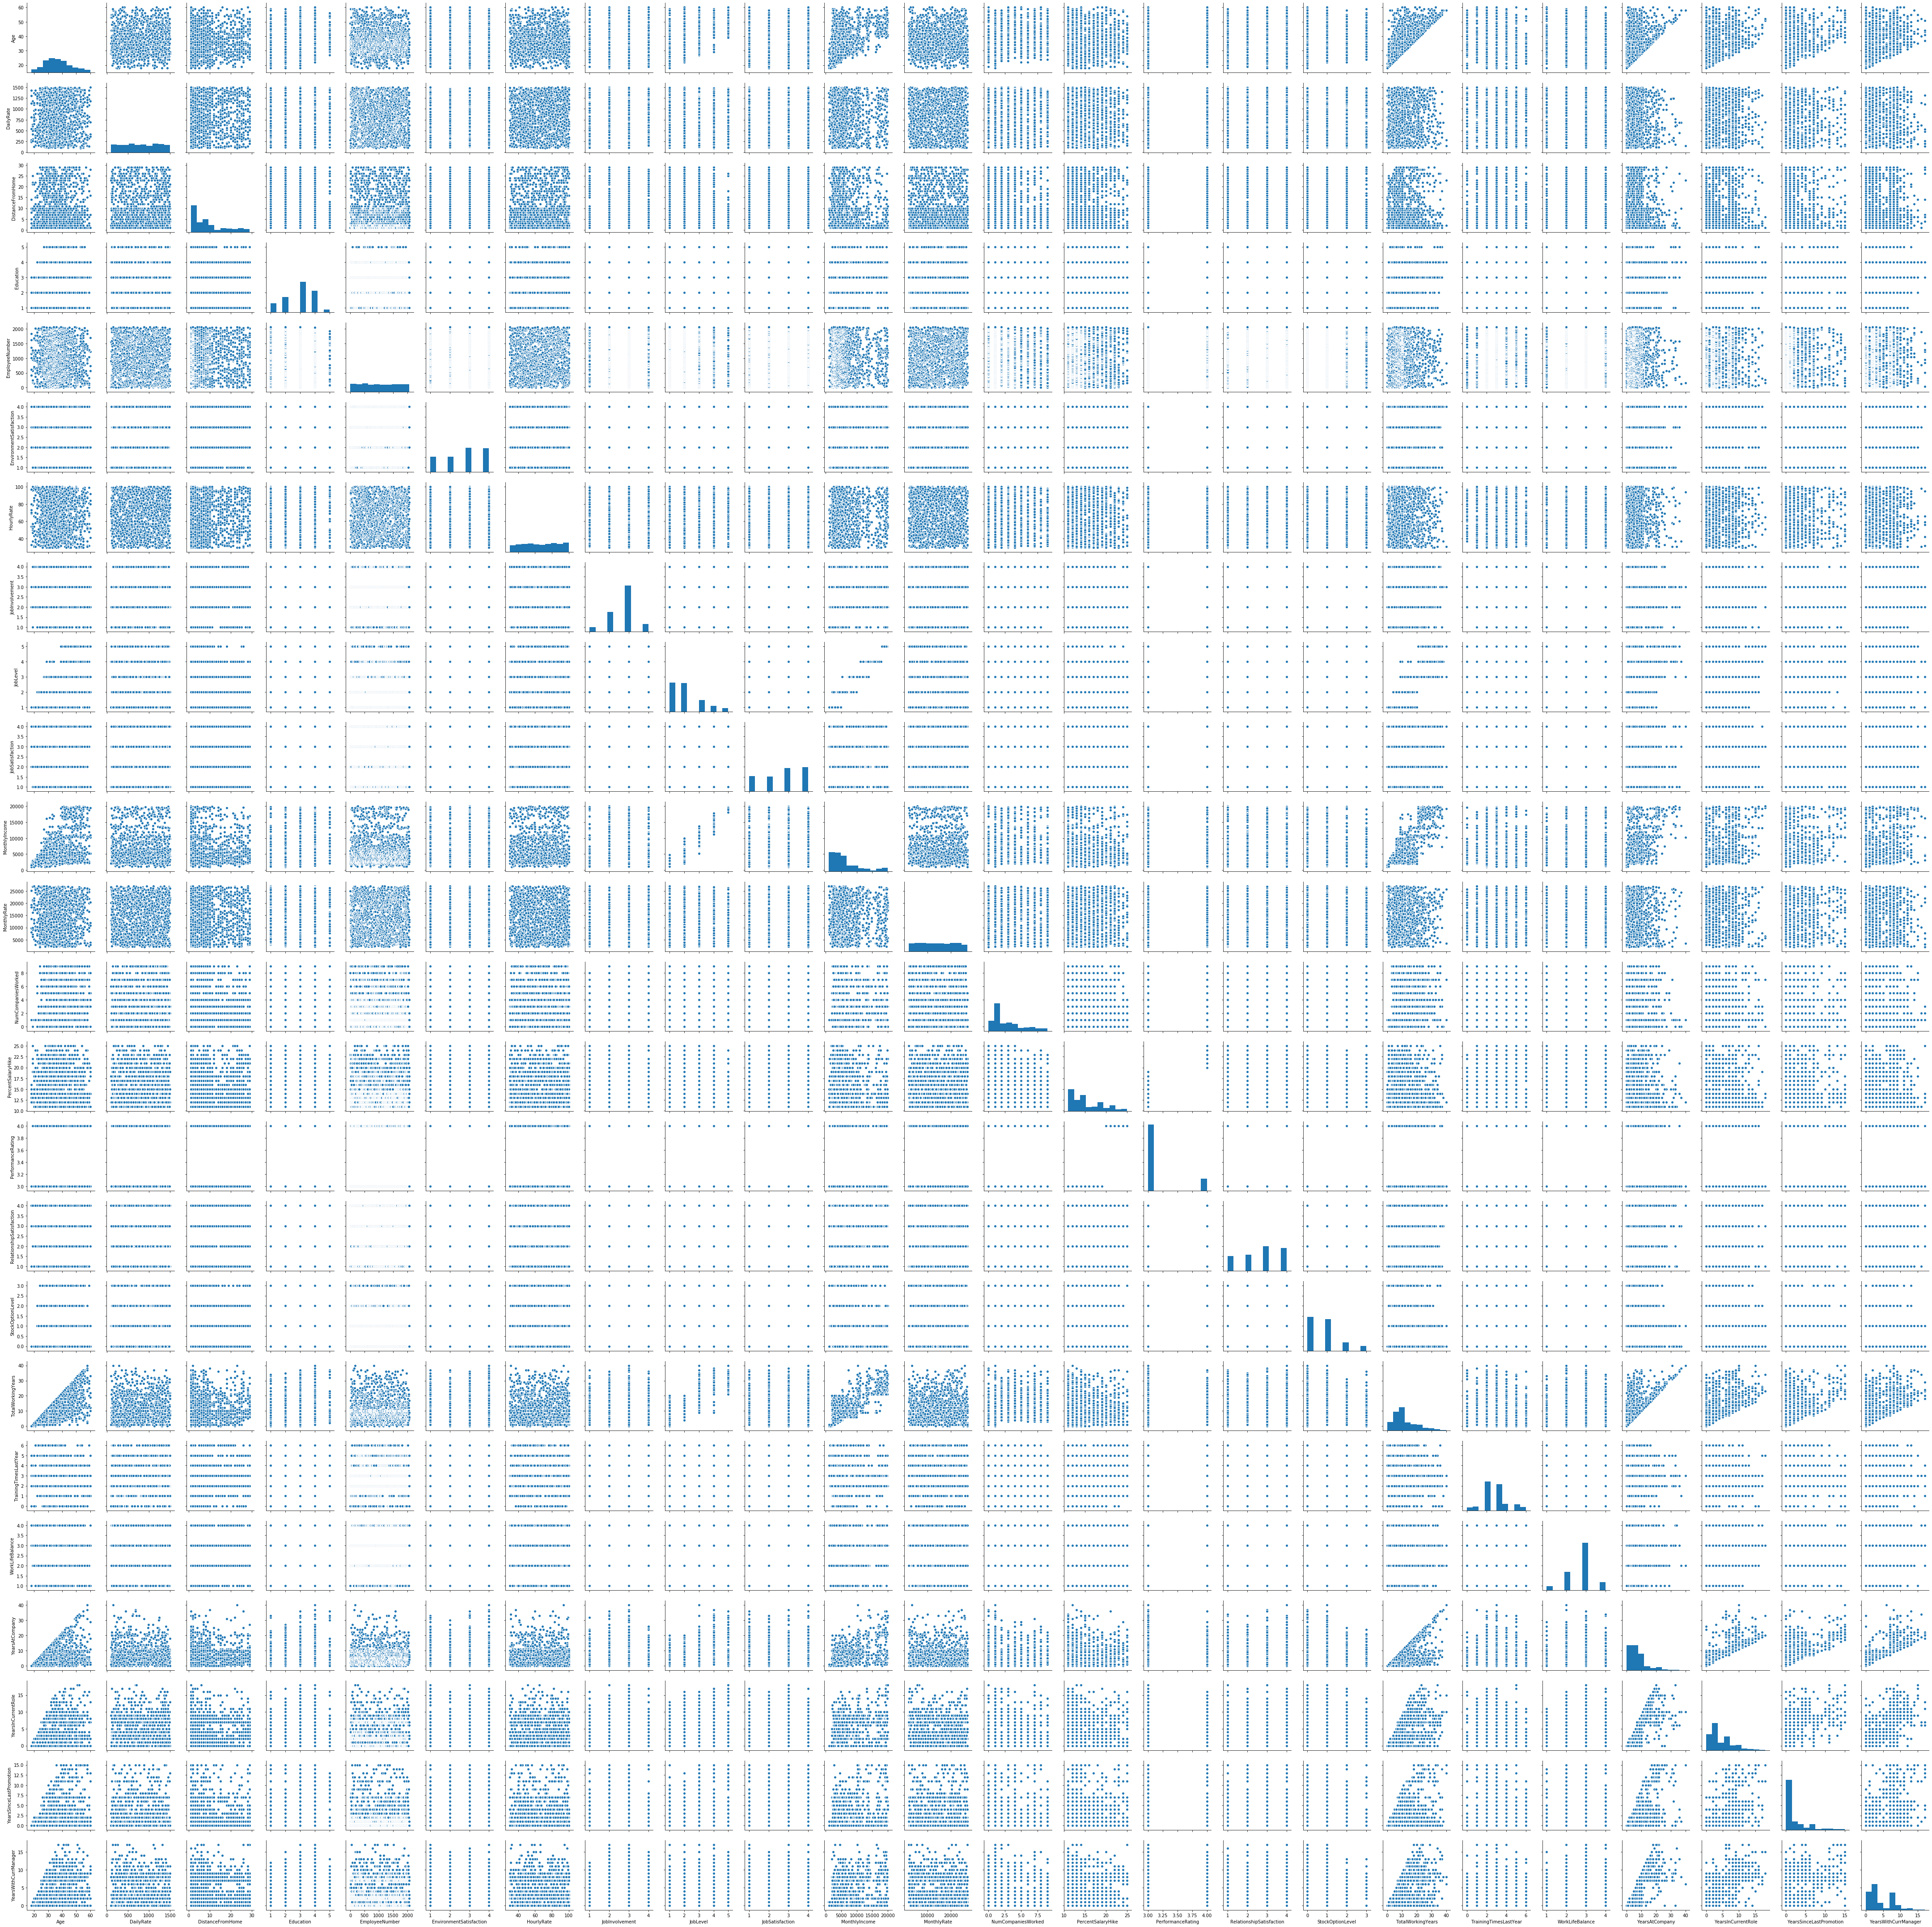

In [16]:
sns.pairplot(data)

In [17]:
data.shape

(1470, 32)

In [18]:
data.Attrition.unique()

array(['Yes', 'No'], dtype=object)

In [19]:
data.Age.unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60], dtype=int64)

In [20]:
data.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [21]:
data.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

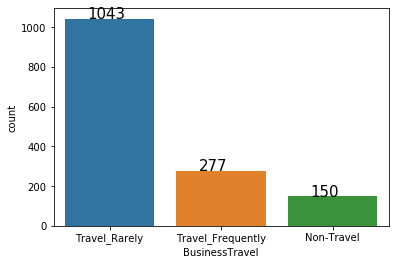

In [22]:
ax = sns.countplot(x='BusinessTravel',data=data)
for i in ax.patches:
    ax.text(i.get_x()+.20, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=15)

In [23]:
data.DailyRate.nunique()

886

In [24]:
data.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [25]:
data.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

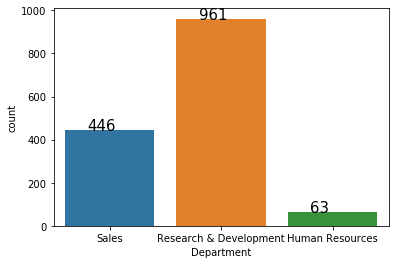

In [26]:
ax = sns.countplot(x='Department',data=data)
for i in ax.patches:
    ax.text(i.get_x()+.20, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=15)

In [27]:
data.DistanceFromHome.nunique()

29

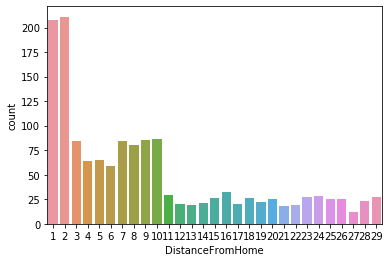

In [28]:
sns.countplot(x='DistanceFromHome',data=data)

In [29]:
data.Education.unique()

array([2, 1, 4, 3, 5], dtype=int64)

In [30]:
data.Education.value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

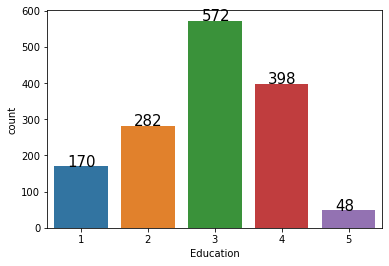

In [31]:
ax = sns.countplot(x='Education',data=data)
for i in ax.patches:
    ax.text(i.get_x()+.20, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=15)

In [32]:
data.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [33]:
data.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

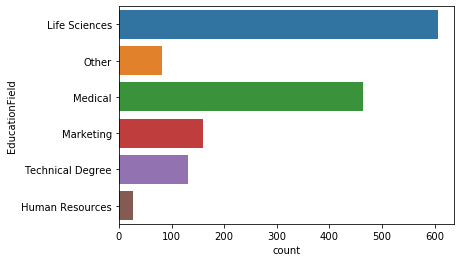

In [34]:
sns.countplot(y='EducationField',data=data)

In [35]:
data.EmployeeNumber.nunique()

1470

In [36]:
data = data.drop(['EmployeeNumber'],axis=1)

In [37]:
data.MaritalStatus.unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [38]:
data.MaritalStatus.value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

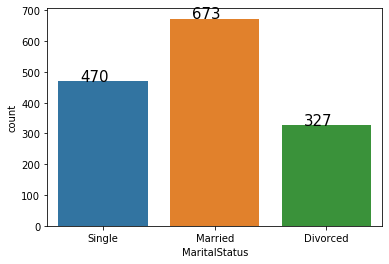

In [39]:
ax = sns.countplot(x='MaritalStatus',data=data)
for i in ax.patches:
    ax.text(i.get_x()+.20, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=15)

In [40]:
data.MonthlyIncome.nunique()

1349

In [41]:
data.MonthlyRate.nunique()

1427

In [42]:
data.JobInvolvement.unique()

array([3, 2, 4, 1], dtype=int64)

In [43]:
data.JobInvolvement.value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

In [44]:
data.JobLevel.unique()

array([2, 1, 3, 4, 5], dtype=int64)

In [45]:
data.JobLevel.value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

In [46]:
data.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'], dtype=object)

In [47]:
data.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

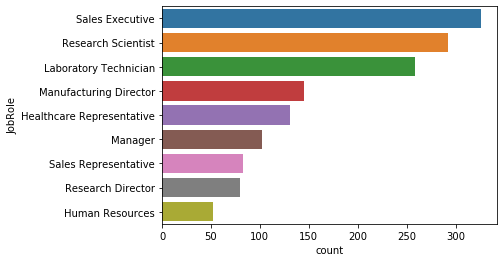

In [48]:
sns.countplot(y='JobRole',data=data)


In [49]:
data.JobSatisfaction.unique()

array([4, 2, 3, 1], dtype=int64)

In [50]:
data.JobSatisfaction.value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [51]:
data.EnvironmentSatisfaction.unique()

array([2, 3, 4, 1], dtype=int64)

In [52]:
data.EnvironmentSatisfaction.value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

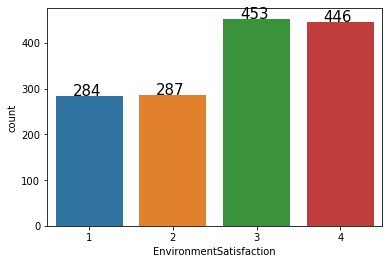

In [53]:
ax = sns.countplot(x='EnvironmentSatisfaction',data=data)
for i in ax.patches:
    ax.text(i.get_x()+.20, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=15)

In [54]:
data.Gender.nunique()

2

In [55]:
data.Gender.value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

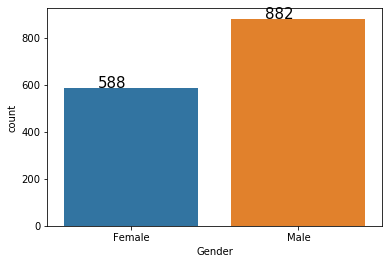

In [56]:
ax = sns.countplot(x='Gender',data=data)
for i in ax.patches:
    ax.text(i.get_x()+.20, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=15)

In [57]:
data.OverTime.unique()

array(['Yes', 'No'], dtype=object)

In [58]:
data.OverTime.value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

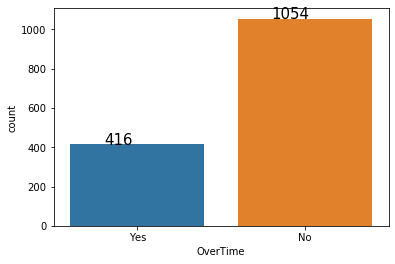

In [59]:
ax = sns.countplot(x='OverTime',data=data)
for i in ax.patches:
    ax.text(i.get_x()+.20, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=15)

In [60]:
data.PercentSalaryHike.unique()

array([11, 23, 15, 12, 13, 20, 22, 21, 17, 14, 16, 18, 19, 24, 25], dtype=int64)

In [61]:
data.PercentSalaryHike.nunique()

15

In [62]:
data.PercentSalaryHike.value_counts()

11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64

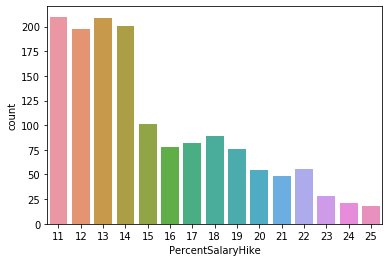

In [63]:
sns.countplot(x=data.PercentSalaryHike,data=data)


In [64]:
data.PerformanceRating.unique()

array([3, 4], dtype=int64)

In [65]:
data.PerformanceRating.value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

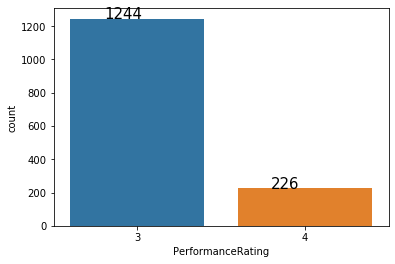

In [66]:
ax = sns.countplot(x=data.PerformanceRating,data=data)
for i in ax.patches:
    ax.text(i.get_x()+.20, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=15)

In [67]:
data.RelationshipSatisfaction.unique()

array([1, 4, 2, 3], dtype=int64)

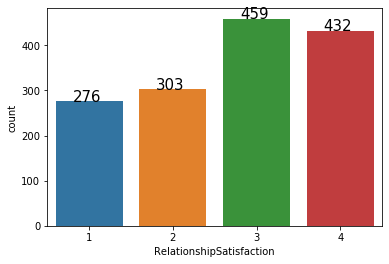

In [68]:
ax = sns.countplot(x=data.RelationshipSatisfaction,data=data)
for i in ax.patches:
    ax.text(i.get_x()+.20, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=15)

In [69]:
data.StockOptionLevel.unique()

array([0, 1, 3, 2], dtype=int64)

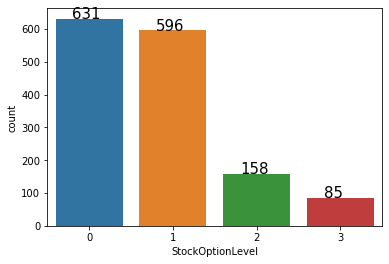

In [70]:
ax = sns.countplot(x=data.StockOptionLevel,data=data)
for i in ax.patches:
    ax.text(i.get_x()+.20, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=15)

In [71]:
data.TotalWorkingYears.nunique()

40

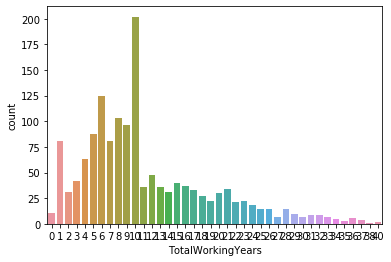

In [72]:
sns.countplot(x=data.TotalWorkingYears,data=data)


In [73]:
data.YearsAtCompany.nunique()

37

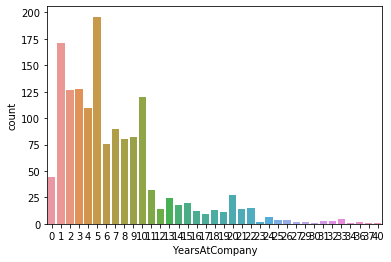

In [74]:
sns.countplot(x=data.YearsAtCompany,data=data)


In [75]:
data.YearsInCurrentRole.nunique()

19

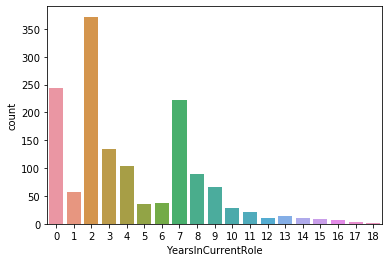

In [76]:
sns.countplot(x=data.YearsInCurrentRole,data=data)


# Department wise performances.

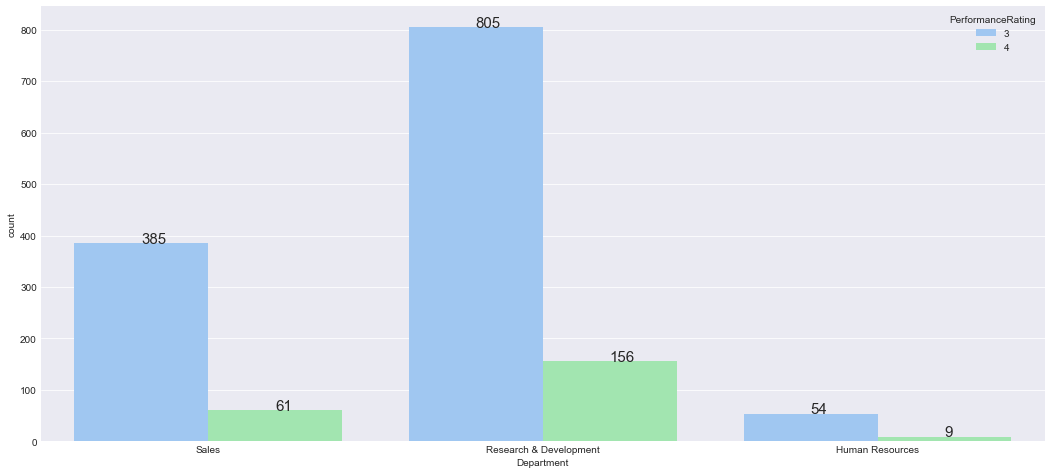

In [77]:
sns.set_style('darkgrid')
plt.figure(figsize=(18,8))
ax=sns.countplot(x='Department',data=data,hue='PerformanceRating',palette="pastel")
for i in ax.patches:
    ax.text(i.get_x()+.20, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=15)

# Top 3 Important Factors affecting employee performance.

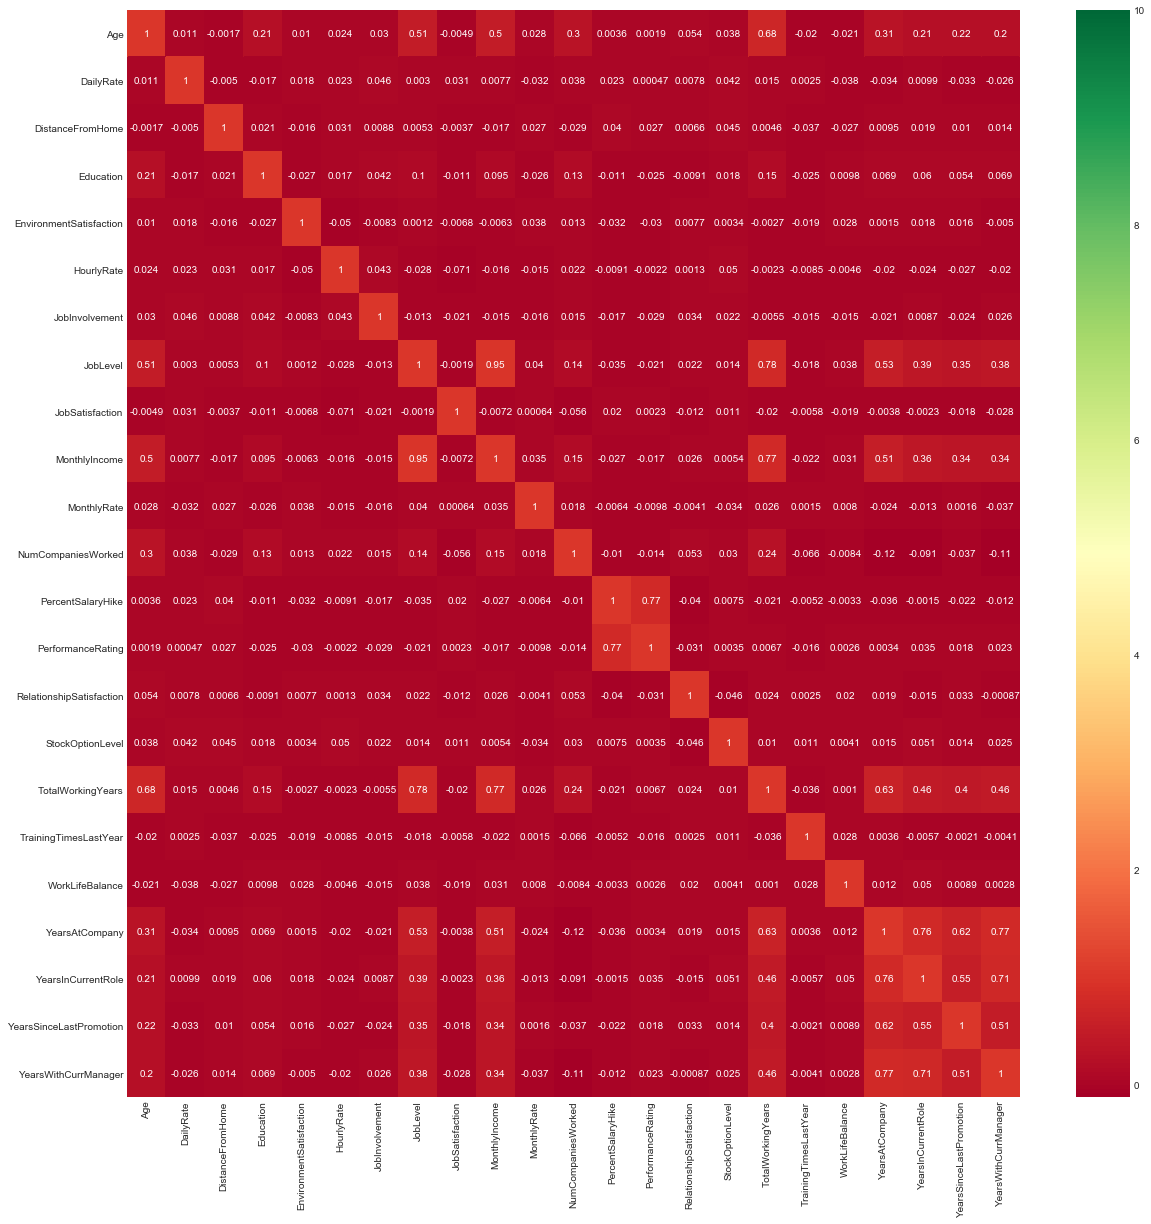

In [79]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn",vmax=10)

In [ ]:
# Top 3 Important Factors affecting employee performance
JobLevel
MonthlyIncome
TotalworkingYear

# Training model and Predicting

In [80]:
data.loc[data['Attrition']=='No','Attrition'] = 0
data.loc[data['Attrition']=='Yes','Attrition'] = 1
data.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender         ...           PerformanceRating  RelationshipSatisfaction  \
0  Female         ...                           3                         1   
1    Male         ...                           4                         4   
2    Male         ...                           3                         2   
3  Female         ...                           3                         3   
4    Male         ...                           3                         4   

   StockOptionLevel TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
0                 0                 8                      0               1   
1                 1                10                      3               3   
2                 0                 7                      3               3   
3                 0                 8                      3               3   
4                 1                 6                      3               3   

   YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0               6                   4                        0   
1              10                   7                        1   
2               0                   0                        0   
3               8                   7                        3   
4               2                   2                        2   

  YearsWithCurrManager  
0                    5  
1                    7  
2                    0  
3                    0  
4                    2  

[5 rows x 31 columns]

In [81]:
data = pd.get_dummies(data)

In [82]:
data.head()

Age  Attrition  DailyRate  DistanceFromHome  Education  \
0   41          1       1102                 1          2   
1   49          0        279                 8          1   
2   37          1       1373                 2          2   
3   33          0       1392                 3          4   
4   27          0        591                 2          1   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                        2          94               3         2   
1                        3          61               2         2   
2                        4          92               2         1   
3                        4          56               3         1   
4                        1          40               3         1   

   JobSatisfaction      ...       JobRole_Manufacturing Director  \
0                4      ...                                    0   
1                2      ...                                    0   
2                3      ...                                    0   
3                3      ...                                    0   
4                2      ...                                    0   

   JobRole_Research Director  JobRole_Research Scientist  \
0                          0                           0   
1                          0                           1   
2                          0                           0   
3                          0                           1   
4                          0                           0   

   JobRole_Sales Executive  JobRole_Sales Representative  \
0                        1                             0   
1                        0                             0   
2                        0                             0   
3                        0                             0   
4                        0                             0   

   MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  \
0                       0                      0                     1   
1                       0                      1                     0   
2                       0                      0                     1   
3                       0                      1                     0   
4                       0                      1                     0   

   OverTime_No  OverTime_Yes  
0            0             1  
1            1             0  
2            0             1  
3            0             1  
4            1             0  

[5 rows x 52 columns]

In [83]:
corr = data.corr()
corr

Age  Attrition  DailyRate  \
Age                                1.000000  -0.159205   0.010661   
Attrition                         -0.159205   1.000000  -0.056652   
DailyRate                          0.010661  -0.056652   1.000000   
DistanceFromHome                  -0.001686   0.077924  -0.004985   
Education                          0.208034  -0.031373  -0.016806   
EnvironmentSatisfaction            0.010146  -0.103369   0.018355   
HourlyRate                         0.024287  -0.006846   0.023381   
JobInvolvement                     0.029820  -0.130016   0.046135   
JobLevel                           0.509604  -0.169105   0.002966   
JobSatisfaction                   -0.004892  -0.103481   0.030571   
MonthlyIncome                      0.497855  -0.159840   0.007707   
MonthlyRate                        0.028051   0.015170  -0.032182   
NumCompaniesWorked                 0.299635   0.043494   0.038153   
PercentSalaryHike                  0.003634  -0.013478   0.022704   
PerformanceRating                  0.001904   0.002889   0.000473   
RelationshipSatisfaction           0.053535  -0.045872   0.007846   
StockOptionLevel                   0.037510  -0.137145   0.042143   
TotalWorkingYears                  0.680381  -0.171063   0.014515   
TrainingTimesLastYear             -0.019621  -0.059478   0.002453   
WorkLifeBalance                   -0.021490  -0.063939  -0.037848   
YearsAtCompany                     0.311309  -0.134392  -0.034055   
YearsInCurrentRole                 0.212901  -0.160545   0.009932   
YearsSinceLastPromotion            0.216513  -0.033019  -0.033229   
YearsWithCurrManager               0.202089  -0.156199  -0.026363   
BusinessTravel_Non-Travel         -0.011215  -0.074457   0.012096   
BusinessTravel_Travel_Frequently  -0.024743   0.115143  -0.011776   
BusinessTravel_Travel_Rarely       0.028791  -0.049538   0.002078   
Department_Human Resources         0.020523   0.016832  -0.026726   
Department_Research & Development  0.017883  -0.085293   0.014871   
Department_Sales                  -0.027549   0.080855  -0.003616   
EducationField_Human Resources     0.001696   0.036466  -0.043144   
EducationField_Life Sciences       0.016824  -0.032703   0.004028   
EducationField_Marketing           0.038162   0.055781  -0.064449   
EducationField_Medical            -0.006354  -0.046999   0.034202   
EducationField_Other              -0.041466  -0.017898  -0.003893   
EducationField_Technical Degree   -0.027604   0.069355   0.030869   
Gender_Female                      0.036311  -0.029453   0.011716   
Gender_Male                       -0.036311   0.029453  -0.011716   
JobRole_Healthcare Representative  0.098825  -0.078696   0.040141   
JobRole_Human Resources           -0.029856   0.036215  -0.021156   
JobRole_Laboratory Technician     -0.143176   0.098290  -0.006728   
JobRole_Manager                    0.294248  -0.083316  -0.013224   
JobRole_Manufacturing Director     0.049726  -0.082994  -0.005302   
JobRole_Research Director          0.185891  -0.088870  -0.000021   
JobRole_Research Scientist        -0.146518  -0.000360  -0.002624   
JobRole_Sales Executive           -0.002001   0.019774  -0.000513   
JobRole_Sales Representative      -0.175785   0.157234   0.005375   
MaritalStatus_Divorced             0.033120  -0.087716   0.037080   
MaritalStatus_Married              0.083919  -0.090984   0.040035   
MaritalStatus_Single              -0.119185   0.175419  -0.075835   
OverTime_No                       -0.028062  -0.246118  -0.009135   
OverTime_Yes                       0.028062   0.246118   0.009135   

                                   DistanceFromHome  Education  \
Age                                       -0.001686   0.208034   
Attrition                                  0.077924  -0.031373   
DailyRate                                 -0.004985  -0.016806   
DistanceFromHome                           1.000000   0.021042   
Education                                  0.021042 

In [84]:
data.dtypes

Age                                  int64
Attrition                            int64
DailyRate                            int64
DistanceFromHome                     int64
Education                            int64
EnvironmentSatisfaction              int64
HourlyRate                           int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
MonthlyIncome                        int64
MonthlyRate                          int64
NumCompaniesWorked                   int64
PercentSalaryHike                    int64
PerformanceRating                    int64
RelationshipSatisfaction             int64
StockOptionLevel                     int64
TotalWorkingYears                    int64
TrainingTimesLastYear                int64
WorkLifeBalance                      int64
YearsAtCompany                       int64
YearsInCurrentRole                   int64
YearsSinceLastPromotion              int64
YearsWithCu

# Logistic Regression

In [85]:
x_train = data.drop(['Attrition'],axis=1)
y_train = data['Attrition']
X,x_test,Y,y_test = train_test_split(x_train, y_train, test_size=0.3,random_state=20)
len(x_test)

441

In [86]:
clf = LogisticRegression()
clf.fit(np.array(X),Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [87]:
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test,y_pred, normalize=True, sample_weight=None)
accuracy

0.86848072562358281

In [88]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.97      0.93       371
          1       0.69      0.31      0.43        70

avg / total       0.85      0.87      0.85       441



In [89]:
data = data.drop(['Department_Human Resources','EducationField_Life Sciences','Gender_Female','JobRole_Laboratory Technician','MaritalStatus_Divorced'],axis=1)

In [90]:
features = list((data.drop(['Attrition'],axis=1)).columns)
target = 'Attrition'
print(features)
print(target)
print(len(features))

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Research & Development', 'Department_Sales', 'EducationField_Human Resources', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'Gender_Male', 'JobRole_Healthcare Representative', 'JobRole_Human Resources', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative', 'Mari

# RandomForestClassifier

In [91]:
x_train, x_test, y_train, y_test = train_test_split(data[features],data[target],test_size=0.3,random_state=1)
rf = RandomForestClassifier(n_estimators=35,criterion="entropy")
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=35, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [92]:

print("Random Forest")
print("Accuracy: ",rf.score(x_test,y_test))
y_pred = rf.predict(x_test)
print("Precision: ",metrics.precision_score(y_test,y_pred))
print("Recall: ",metrics.recall_score(y_test,y_pred))
print("Confusion Matrix: \n",metrics.confusion_matrix(y_test,y_pred))

Random Forest
Accuracy:  0.857142857143
Precision:  0.818181818182
Recall:  0.233766233766
Confusion Matrix: 
 [[360   4]
 [ 59  18]]


In [93]:
majority_class = data[data['Attrition']==0]
minority_class = data[data['Attrition']==1]
print(len(majority_class))
print(len(minority_class))

1233
237


In [94]:
minority_class_upsampled = resample(minority_class,replace=True,n_samples=1233,random_state=1)

In [95]:
data_balanced = pd.concat([majority_class,minority_class_upsampled])
data_balanced['Attrition'].value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

In [96]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(data_balanced[features],data_balanced[target],test_size=0.3,random_state = 1)

In [97]:
print('RandomForest')
rf.fit(x_train1,y_train1)

RandomForest


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=35, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [98]:
y_test1.value_counts()

1    385
0    355
Name: Attrition, dtype: int64

In [99]:
print("Random Forest")
print("Accuracy: ",rf.score(x_test1,y_test1))
y_pred1 = rf.predict(x_test1)
print("Precision: ",metrics.precision_score(y_test1,y_pred1))
print("Recall: ",metrics.recall_score(y_test1,y_pred1))
print("Confusion Matrix: \n",metrics.confusion_matrix(y_test1,y_pred1))

Random Forest
Accuracy:  0.967567567568
Precision:  0.945679012346
Recall:  0.994805194805
Confusion Matrix: 
 [[333  22]
 [  2 383]]


# Feature Importances

In [100]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = features,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

importance
MonthlyIncome                        0.086073
Age                                  0.055241
MonthlyRate                          0.051512
DailyRate                            0.048450
DistanceFromHome                     0.047198
HourlyRate                           0.043904
YearsAtCompany                       0.040124
TotalWorkingYears                    0.038229
OverTime_No                          0.036910
OverTime_Yes                         0.035640
PercentSalaryHike                    0.035333
NumCompaniesWorked                   0.031344
StockOptionLevel                     0.028873
EnvironmentSatisfaction              0.028872
YearsInCurrentRole                   0.028210
YearsWithCurrManager                 0.027497
RelationshipSatisfaction             0.025334
JobLevel                             0.025257
JobSatisfaction                      0.025150
JobInvolvement                       0.024139
YearsSinceLastPromotion              0.023765
TrainingTimesLastYear                0.022579
WorkLifeBalance                      0.021869
Education                            0.020867
MaritalStatus_Single                 0.015037
Gender_Male                          0.010275
BusinessTravel_Travel_Frequently     0.010075
Department_Sales                     0.009984
JobRole_Research Scientist           0.009524
Department_Research & Development    0.009409
MaritalStatus_Married                0.009368
EducationField_Medical               0.009285
BusinessTravel_Non-Travel            0.008607
BusinessTravel_Travel_Rarely         0.007539
EducationField_Marketing             0.007112
EducationField_Technical Degree      0.005916
JobRole_Sales Executive              0.005871
PerformanceRating                    0.004881
JobRole_Sales Representative         0.004268
JobRole_Manufacturing Director       0.004265
JobRole_Healthcare Representative    0.003923
JobRole_Manager                      0.003705
JobRole_Research Director            0.003166
EducationField_Other                 0.002707
JobRole_Human Resources              0.001989
EducationField_Human Resources       0.000722

# Decision Tree

In [101]:

clf=tree.DecisionTreeClassifier(max_depth=3,random_state=200,criterion='entropy')
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.83219954648526073

In [102]:
metrics.roc_auc_score(y_test,clf.predict_proba(x_test)[:,1])

0.72987726559155142

In [103]:
clf=tree.DecisionTreeClassifier(max_depth=3,random_state=200)
mod = model_selection.GridSearchCV(clf,param_grid={'max_depth':[2,3,4,5,6]})
mod.fit(x_train,y_train)
clf=tree.DecisionTreeClassifier(max_depth=3,random_state=200,criterion='entropy')
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.83219954648526073

In [104]:
mod.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=200,
            splitter='best')

In [105]:
mod.best_score_

0.84548104956268222

In [106]:
dot_data = tree.export_graphviz(clf,out_file=None,feature_names=features)

In [107]:
os.environ['PATH']+= os.pathsep+'C:\\Program Files (x86)\\Graphviz2.38\\bin'
graph = py.graph_from_dot_data(dot_data)

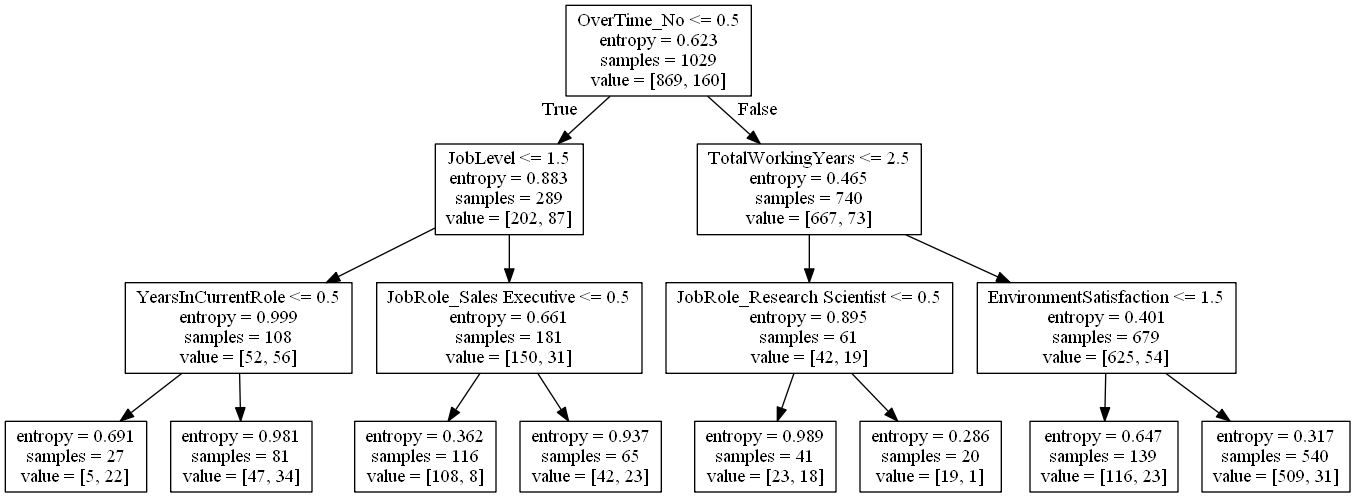

In [108]:

Image(graph.create_png())

# Gradient Boosting

In [109]:
model = XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

In [110]:
model.feature_importances_

array([ 0.01566096,  0.0198463 ,  0.02346509,  0.01257071,  0.01917609,
        0.01523735,  0.0319161 ,  0.05835809,  0.01552046,  0.02742254,
        0.01334597,  0.0244909 ,  0.01269065,  0.        ,  0.01568975,
        0.03892793,  0.02128216,  0.0164388 ,  0.03046846,  0.02095182,
        0.0162863 ,  0.02136496,  0.0196798 ,  0.01707613,  0.02332834,
        0.00360414,  0.01793782,  0.01926592,  0.00491838,  0.03584588,
        0.0137348 ,  0.03243528,  0.01493528,  0.02352342,  0.00730285,
        0.        ,  0.        ,  0.08897472,  0.        ,  0.03141809,
        0.05491576,  0.02252503,  0.016851  ,  0.03164339,  0.04897248,  0.        ], dtype=float32)

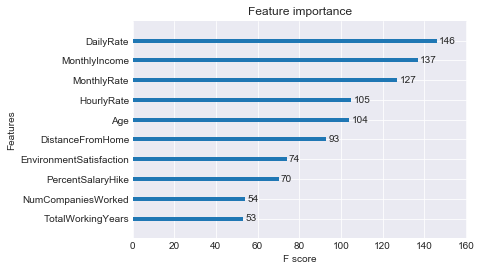

In [113]:
# plot feature importance
plot_importance(model,importance_type='weight',max_num_features=10)
pyplot.show()

# Recommendations to improve employee performance based on insights from analysis.


In [ ]:
On the basis of analysis An Employee can Imporve their performance from DailyRate,MonthlyIncome and the overtime etc.